<h3><b>Task_02</b> by GANESH SHELAR</h3>

<hr>

GitHub Repo : [Link](https://github.com/ganeshs14/TSF-GRIP-DSBA-TASK/tree/main/Task_02)

LinkedIn Profile : [Link](https://www.linkedin.com/in/ganesh-shelar)

<hr>

# Prediction using Un-supervised Machine Learning.



# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn import datasets
from sklearn.cluster import KMeans

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Data Description

1. sepal length (cm)
2. sepal width in cm
3. petal length in cm
4. petal width in cm

Classes : 

> *Iris Setosa ,Iris Versicolour, Iris Virginica*

# Defining Dataset

> Link of Dataset : http://bit.ly/3kXTdox

In [ ]:
# Load the iris dataset
data = datasets.load_iris()
iris_df = pd.DataFrame(data.data, columns = iris.feature_names)

In [ ]:
# First five datapoints from dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
iris_df.shape

(150, 4)

# EDA - Exploratory Data Analysis

In [ ]:
# All columns in dataset
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# Any 10 datapoints from dataset
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
112,6.8,3.0,5.5,2.1
39,5.1,3.4,1.5,0.2
47,4.6,3.2,1.4,0.2
38,4.4,3.0,1.3,0.2
131,7.9,3.8,6.4,2.0
69,5.6,2.5,3.9,1.1
12,4.8,3.0,1.4,0.1
40,5.0,3.5,1.3,0.3
5,5.4,3.9,1.7,0.4
105,7.6,3.0,6.6,2.1


#### Basic information about the dataset

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Column-wise total Null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

* There are no null values in any column.

#### Basic statistical information about the dataset

In [ ]:
iris_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Pearson's correlation method and Heatmap

In [ ]:
# Use of Pearson's correlation method to co-relate each variable with one another.
iris_df.corr('pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


* Graphical representation of co-related data using colors and to visualize the value of the matrix.

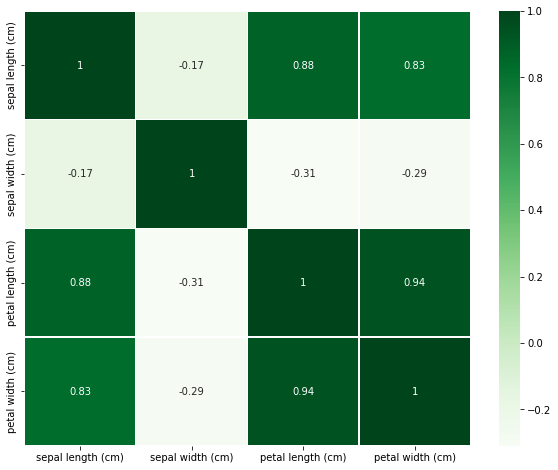

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(iris_df.corr('spearman'), annot=True, cmap='Greens', linewidths=0.2)
plt.show()

#### Plotting multiple pairwise bivariate distributions in a dataset.

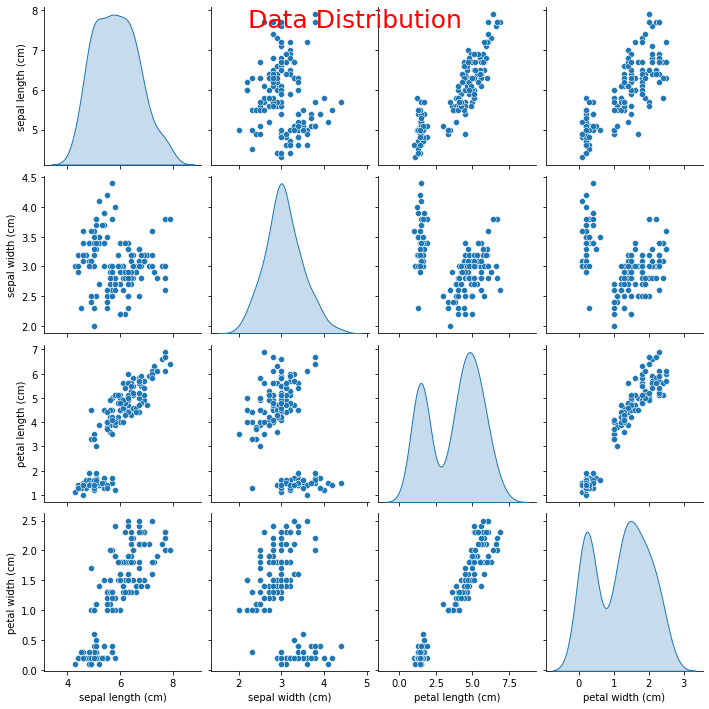

In [ ]:
sns.pairplot(iris_df, diag_kind='kde')
plt.suptitle('Data Distribution', size = 25, color='r')
plt.show()

#### Scatter_matrix to visualize data from different classes.

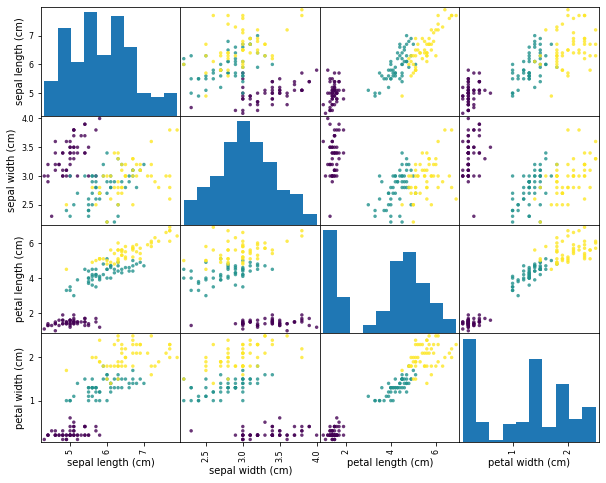

In [138]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, c=iris['target'],marker='o', s=12, alpha=.8, figsize=(10,8))
plt.show()

* Boxplots for checking of outliers in our dataset.

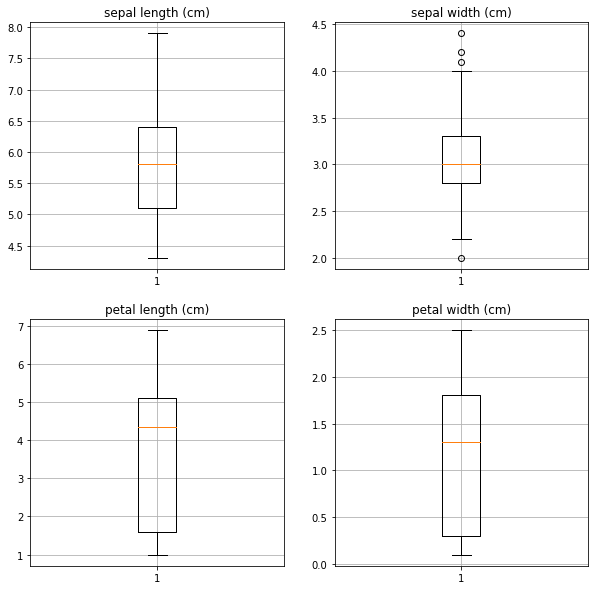

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.boxplot(iris_df['sepal length (cm)'])
plt.title('sepal length (cm)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.boxplot(iris_df['sepal width (cm)'])
plt.title('sepal width (cm)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.boxplot(iris_df['petal length (cm)'])
plt.title('petal length (cm)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.boxplot(iris_df['petal width (cm)'])
plt.title('petal width (cm)')
plt.grid(True)

plt.show()

> The column 'sepal width (cm)' contains an outlier

#### Detecting outliers using the Inter Quantile Range(IQR)

In [ ]:
outliers = []
def detect_outliers_iqr(data):
  data = sorted(data)
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  
  IQR = q3-q1
  lwr_bound = q1-(1.5*IQR)
  upr_bound = q3+(1.5*IQR)

  for i in data: 
    if (i < lwr_bound or i > upr_bound):
      outliers.append(i)
  return outliers# Driver code
sample_outliers = detect_outliers_iqr(iris_df['sepal width (cm)'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [2.0, 4.1, 4.2, 4.4]


#### Mean/Median imputation for handling the outliers.

In [ ]:
# Replacing outliers with median
median = iris_df['sepal width (cm)'].median()
for i in sample_outliers:
  iris_df['sepal width (cm)'].loc[iris_df['sepal width (cm)']==i] = median

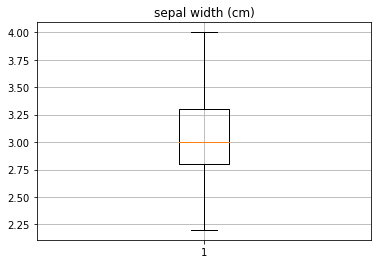

In [ ]:
plt.boxplot(iris_df['sepal width (cm)'])
plt.title('sepal width (cm)')
plt.grid(True)

* The column 'sepal width (cm)' is free from the outliers

# Finding the optimum number of clusters for K Means by using **Elbow Method**

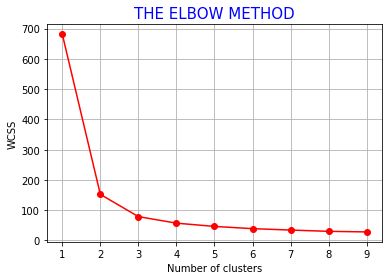

In [ ]:
# Finding the optimum number of clusters for k-means classification

X = data.data

wcss = []

for i in range(1, 10):
  model = KMeans(n_clusters = i, random_state = 42)
  model.fit(X)
  wcss.append(model.inertia_)
    
# Plotting the results onto a line graph, 

plt.plot(range(1, 10), wcss, 'ro-')
plt.title('THE ELBOW METHOD',c='b',size=15)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.grid(True)
plt.show()

* The optimum clusters is where the elbow occurs.

From this we choose the number of clusters as **3**

# **`K-Means Clustering`**



In [ ]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_pred = model.fit_predict(X)

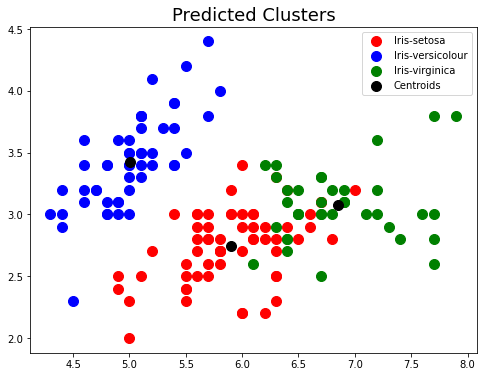

In [ ]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(8,6))

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=100, c='r', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=100, c='b', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=100, c='g', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c='black', label = 'Centroids')
plt.title('Predicted Clusters', size=18)
plt.legend(loc='best')
plt.show()

<center><h2><b>Thank You!!</b></h2></center>